# __DS 203 Assignment 6__

In [1]:
#importing the relevant libraries for data analytics and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the csv file into a pandas dataframe
df=pd.read_csv("master.csv")
n_df=df.copy()
display(df.head(10))
shape=df.shape
print("The number of columns in the dataframe is {}".format(shape[1]))
print("The number of rows in the dataframe is {}".format(shape[0]))
#finding the number of NaN (Not a number) values in the dataframe
NaN=df.isna().sum()
print("Number of NaN values in each column -->")
print(NaN)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


The number of columns in the dataframe is 12
The number of rows in the dataframe is 27820
Number of NaN values in each column -->
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [2]:
#printing the data types of the columns of the dataframe
print(df.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [3]:
df=df.drop(df.columns[8],axis=1)
display(df.head(10))

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,"2,156,624,900",796,Generation X


In [4]:
#We need to convert the commas in the column "gdp_for _year ($)" into null space to convert the string into an integer because as such, it throws an error 'unable to parse string'
my_list=[]
for values in df.iloc[:,8]:
    num_string=""
    for char in values:
        if(char!=","):
            num_string=num_string+char
        else:
            continue
    my_list.append(num_string)
pandas_series=pd.Series(my_list)
df.iloc[:,8]=pandas_series
df.iloc[:,8]=pd.to_numeric(df.iloc[:,8])
display(df.dtypes)
display(df.head(10))
print("\n")
#We also need to remove 'years' from the age column
df.iloc[:,3]=df.iloc[:,3].str.replace("years","")
display(df.head())

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,2156624900,796,Generation X


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,2156624900,796,Boomers


In [5]:
#finding the mode value for the discrete columns
#we have only 1 discrete column 'suicides_number'
my_arr=df.iloc[:,8].unique()
print(len(my_arr))
#the column has 2321 unqiue values
print(df.iloc[:,8].mode())

2321
0             46919625
1             47515189
2             47737955
3             54832578
4             56338028
             ...      
2300    15517926000000
2301    16155255000000
2302    16691517000000
2303    17427609000000
2304    18120714000000
Name:  gdp_for_year ($) , Length: 2305, dtype: int64


In [6]:
#Continuous Variables
#population, suicides/100k, gdp_for_year($), gdp_per_capita($)
#1. Printing the mean of the continuous variables
new_df=df.iloc[:,0:11]
new_df.drop(df.columns[0:5],axis=1,inplace=True)
display(new_df.head())
new_df.drop(new_df.columns[2],axis=1,inplace=True)
display(new_df.head())
new_df.drop(new_df.columns[4],axis=1,inplace=True)
display(new_df.head())

,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,312900,6.71,Albania1987,2156624900,796,Generation X
1,308000,5.19,Albania1987,2156624900,796,Silent
2,289700,4.83,Albania1987,2156624900,796,Generation X
3,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,274300,3.28,Albania1987,2156624900,796,Boomers


,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,312900,6.71,2156624900,796,Generation X
1,308000,5.19,2156624900,796,Silent
2,289700,4.83,2156624900,796,Generation X
3,21800,4.59,2156624900,796,G.I. Generation
4,274300,3.28,2156624900,796,Boomers


,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,312900,6.71,2156624900,796
1,308000,5.19,2156624900,796
2,289700,4.83,2156624900,796
3,21800,4.59,2156624900,796
4,274300,3.28,2156624900,796


In [7]:
info_df=pd.DataFrame(columns=new_df.columns)
info_df.loc[0]=[new_df.iloc[:,0].mean(),new_df.iloc[:,1].mean(),new_df.iloc[:,2].mean(),new_df.iloc[:,3].mean()]
info_df.loc[1]=[new_df.iloc[:,0].max(),new_df.iloc[:,1].max(),new_df.iloc[:,2].max(),new_df.iloc[:,3].max()]
info_df.loc[2]=[new_df.iloc[:,0].min(),new_df.iloc[:,1].min(),new_df.iloc[:,2].min(),new_df.iloc[:,3].min()]
info_df.loc[3]=[new_df.iloc[:,0].var(),new_df.iloc[:,1].var(),new_df.iloc[:,2].var(),new_df.iloc[:,3].var()]
info_df.loc[4]=[new_df.iloc[:,0].std(),new_df.iloc[:,1].std(),new_df.iloc[:,2].std(),new_df.iloc[:,3].std()]
info_df.loc[5]=[new_df.iloc[:,0].median(),new_df.iloc[:,1].median(),new_df.iloc[:,2].median(),new_df.iloc[:,3].median()]
info_df.loc[6]=[new_df.iloc[:,0].quantile(0.25),new_df.iloc[:,1].quantile(0.25),new_df.iloc[:,1].quantile(0.25),new_df.iloc[:,1].quantile(0.25)]
info_df.loc[7]=[new_df.iloc[:,0].quantile(0.75),new_df.iloc[:,1].quantile(0.75),new_df.iloc[:,1].quantile(0.75),new_df.iloc[:,1].quantile(0.75)]
info_df.loc[8]=info_df.loc[7]-info_df.loc[6]
info_df.index=["Mean","Maximum","Minimum","Variance","Standard Deviation","Median","25th percentile","75th percentile","Inter Quartile Range"]
display(info_df)

,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
Mean,1.844794e+06,12.816097,4.455810e+11,1.686646e+04
Maximum,4.380521e+07,224.970000,1.812071e+13,1.263520e+05
Minimum,2.780000e+02,0.000000,4.691962e+07,2.510000e+02
Variance,1.530202e+13,359.538900,2.112982e+24,3.567405e+08
Standard Deviation,3.911779e+06,18.961511,1.453610e+12,1.888758e+04
Median,4.301500e+05,5.990000,4.811469e+10,9.372000e+03
25th percentile,9.749850e+04,0.920000,9.200000e-01,9.200000e-01
75th percentile,1.486143e+06,16.620000,1.662000e+01,1.662000e+01
Inter Quartile Range,1.388645e+06,15.700000,1.570000e+01,1.570000e+01


,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,312900,6.71,2156624900,796
1,308000,5.19,2156624900,796
2,289700,4.83,2156624900,796
3,21800,4.59,2156624900,796
4,274300,3.28,2156624900,796


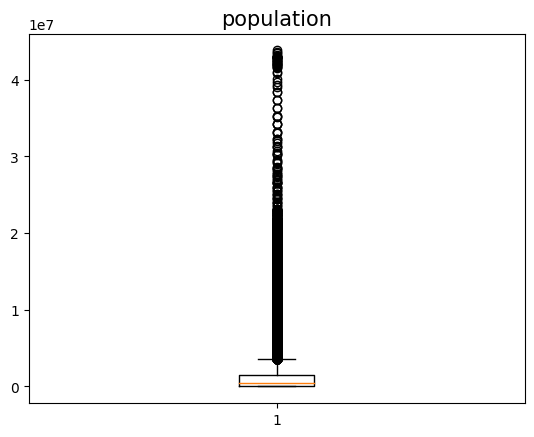

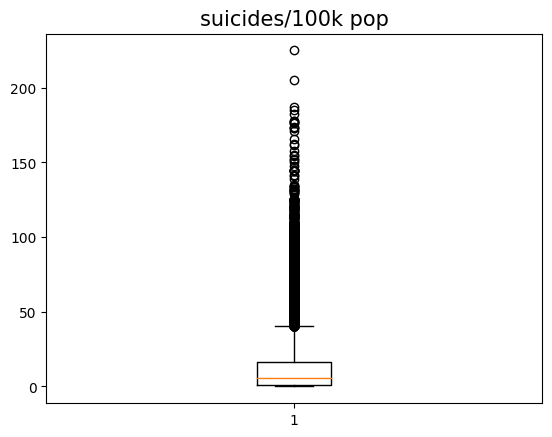

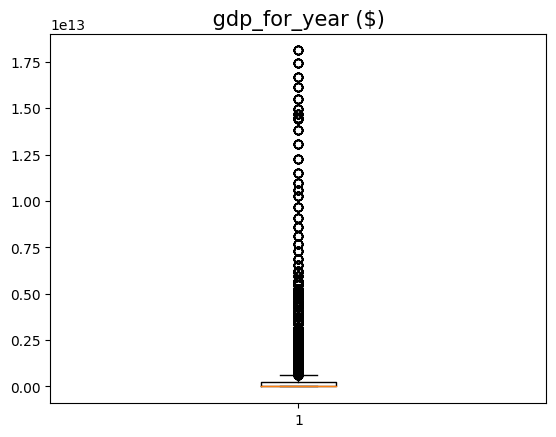

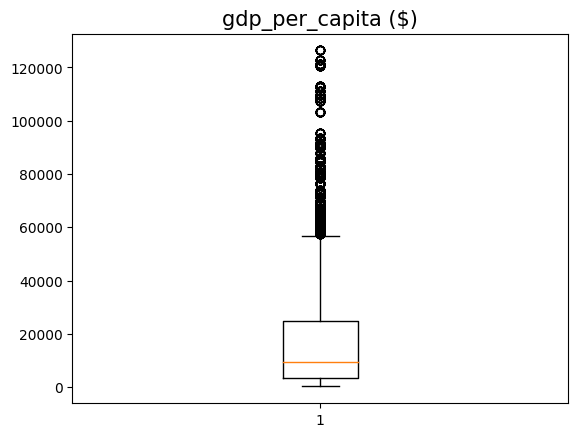

In [8]:
#Box and Whiskers plot for continuous variables
display(new_df.head())
for index in range(0,4):
    plt.boxplot(new_df.iloc[:,index])                        #box and whisker plot
    plt.title(new_df.columns[index],fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

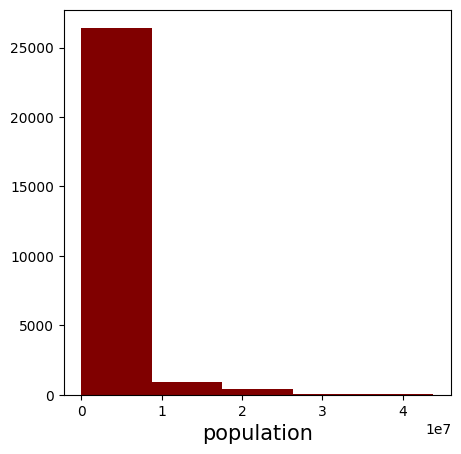

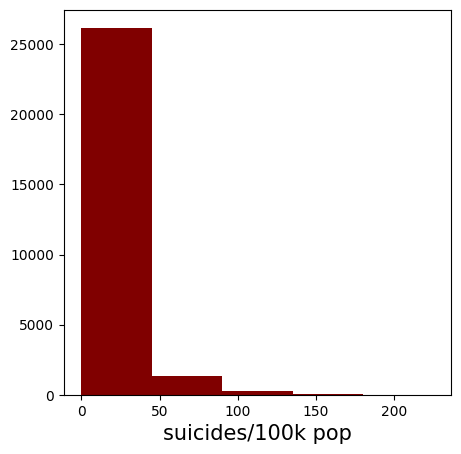

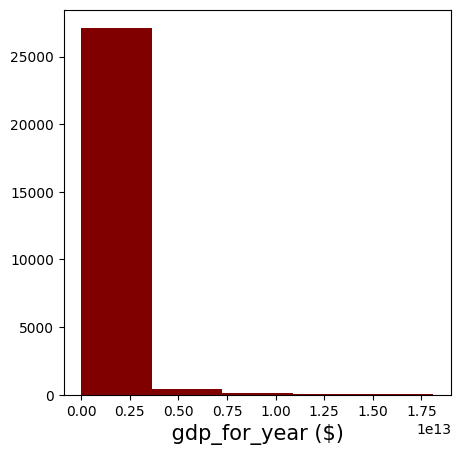

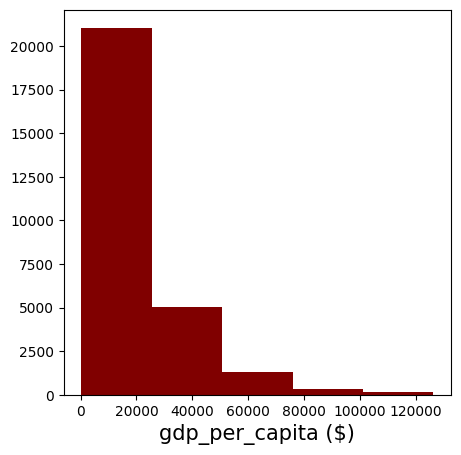

In [9]:
#Plotting the histogram with too few bins
for column in new_df.columns.values:                               #using a for loop to iterate through the columns
     plt.figure(figsize=(5,5))
     plt.hist(new_df[column],5,color="maroon")    #using the appropriate number if bins
     plt.xlabel(column,fontsize=15)                         #specifying the xlabel
     plt.xticks(fontsize=10)
     plt.yticks(fontsize=10)
     plt.show()

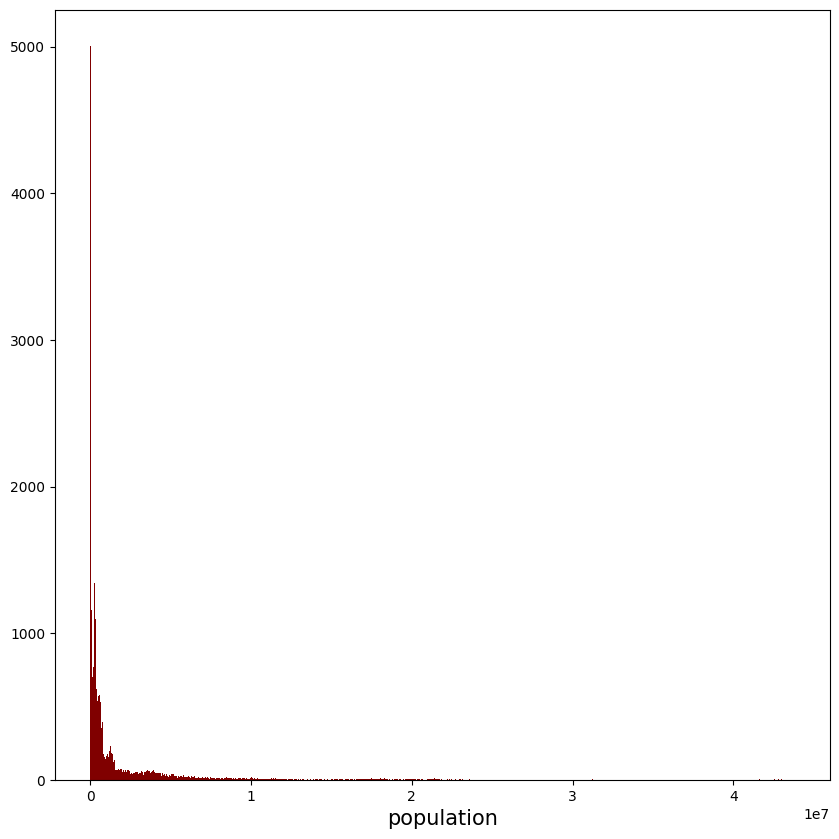

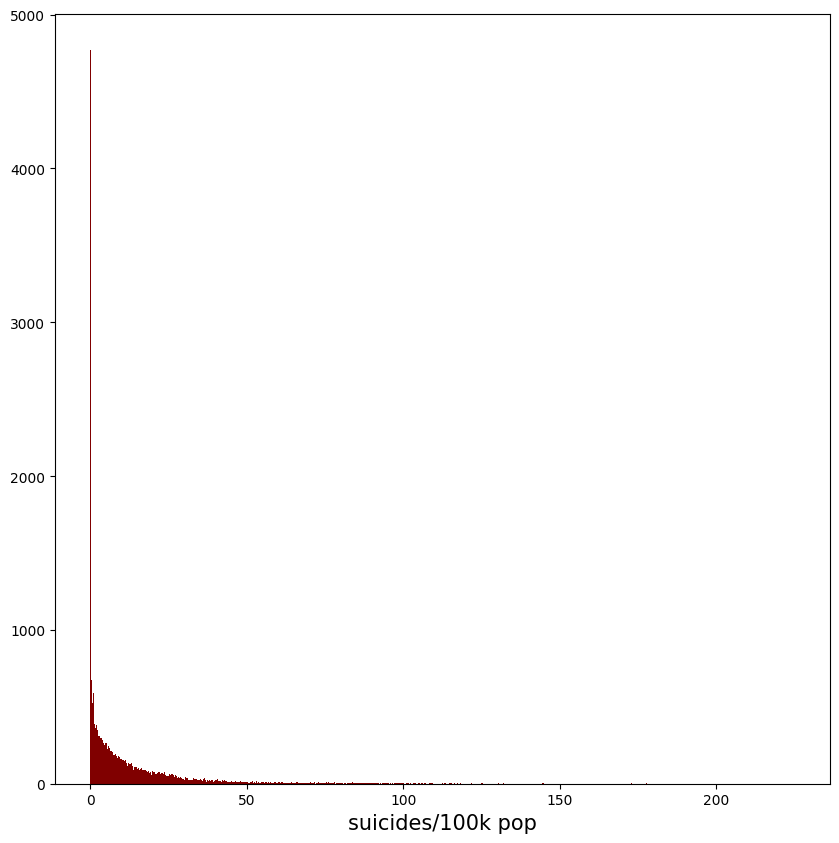

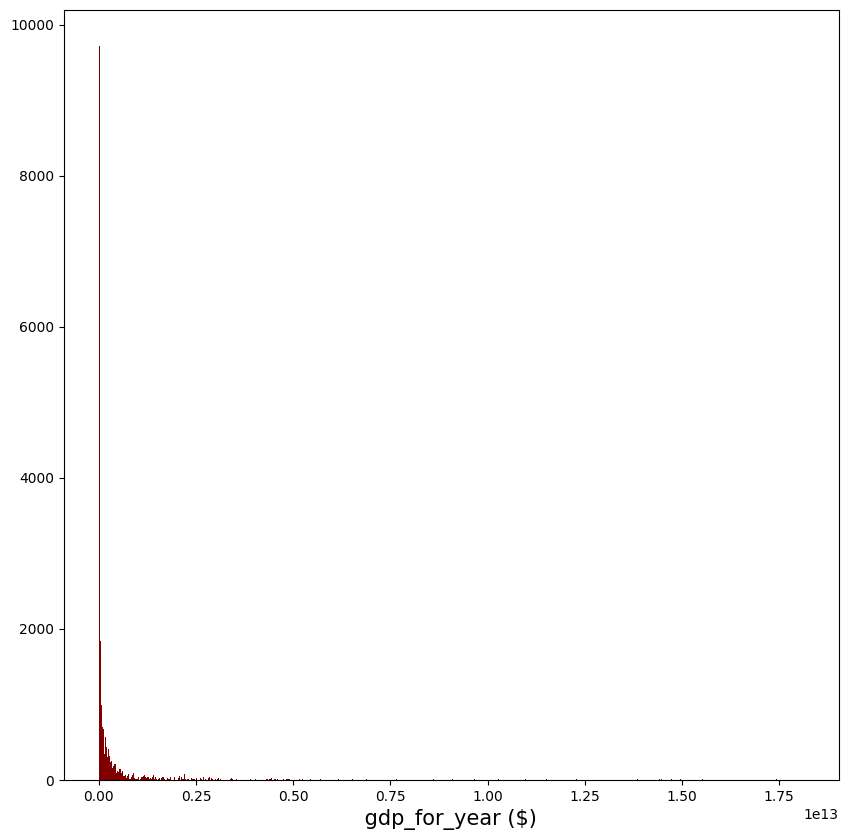

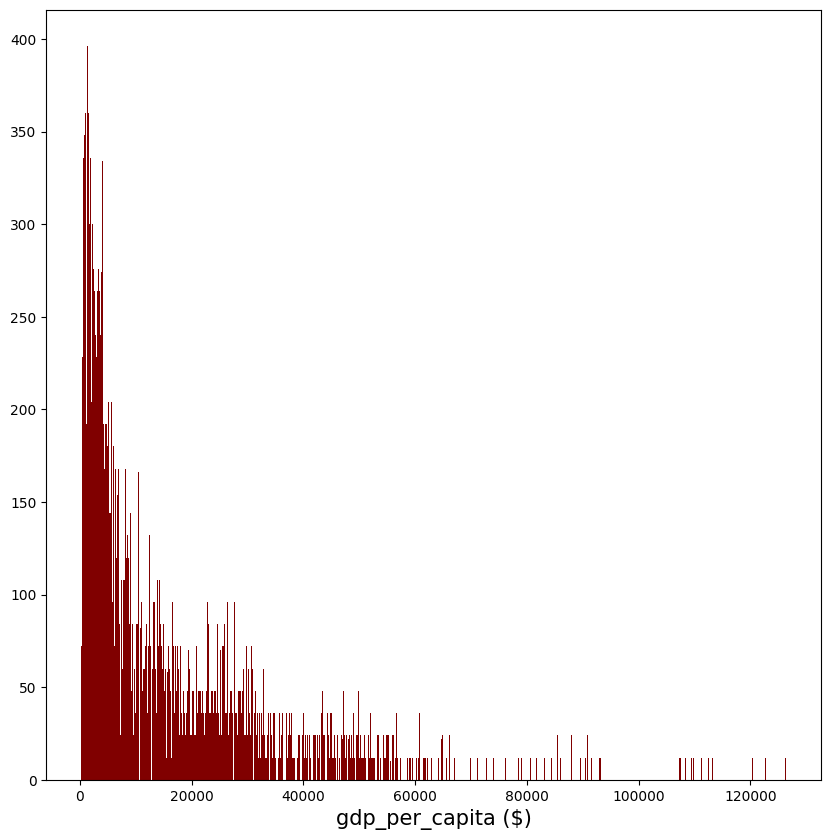

In [10]:
#plotting the histograms with too many bins
for column in new_df.columns.values:                               #using a for loop to iterate through the columns
    plt.figure(figsize=(10,10))
    plt.hist(new_df[column],1000,color="maroon")    #using the appropriate number if bins
    plt.xlabel(column,fontsize=15)                         
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

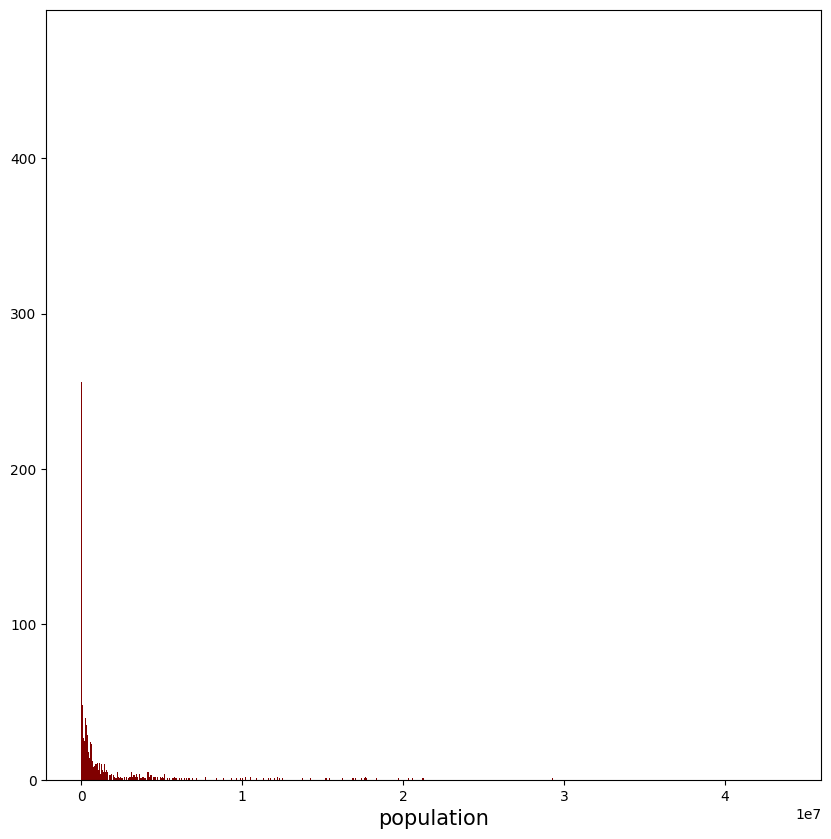

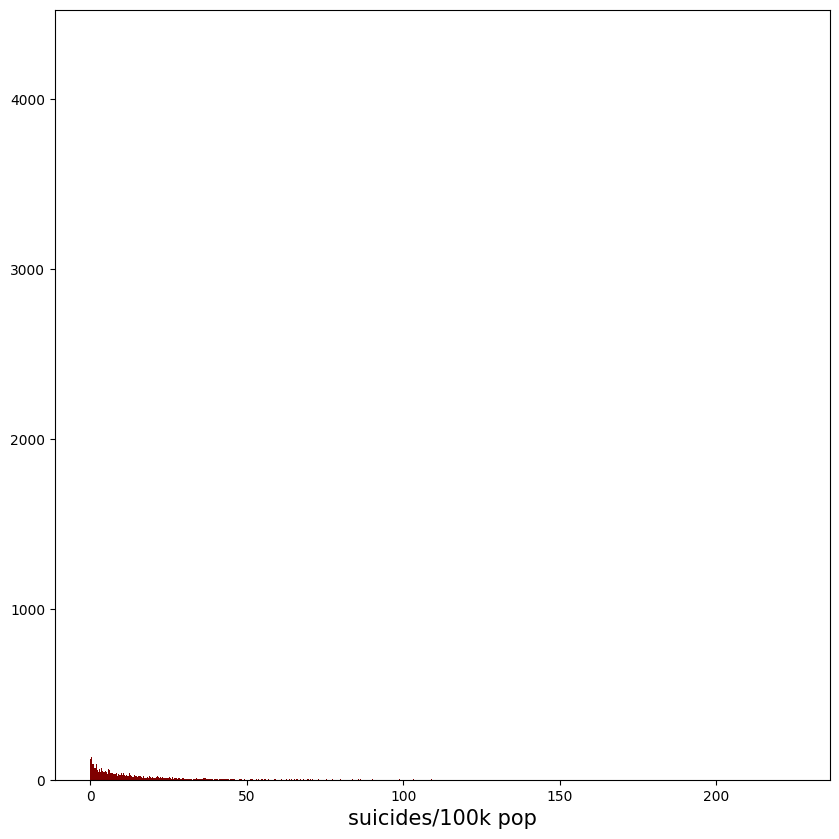

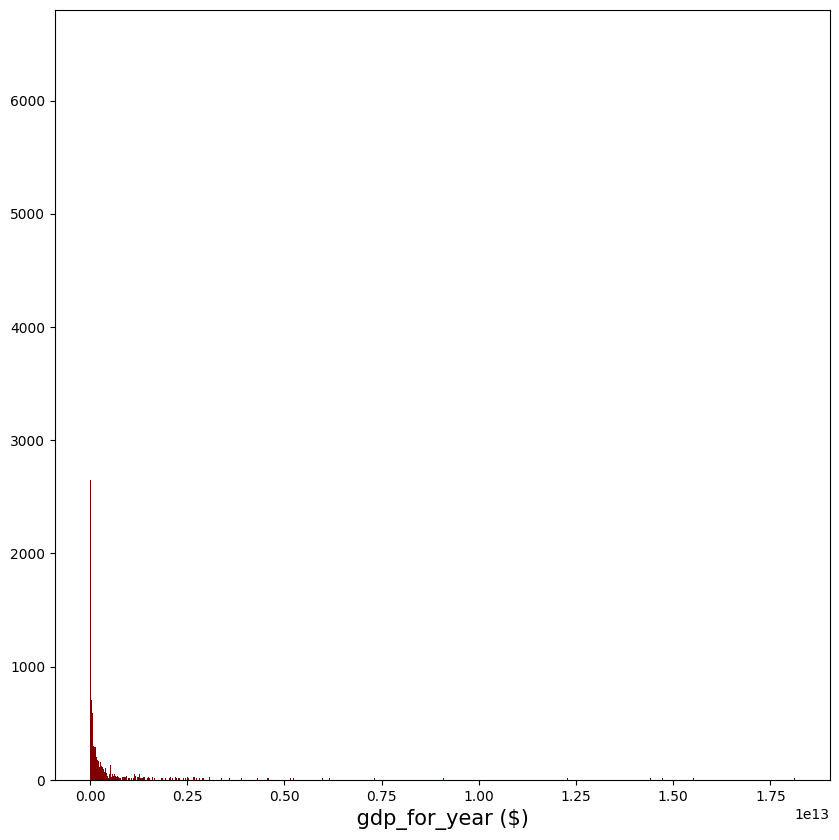

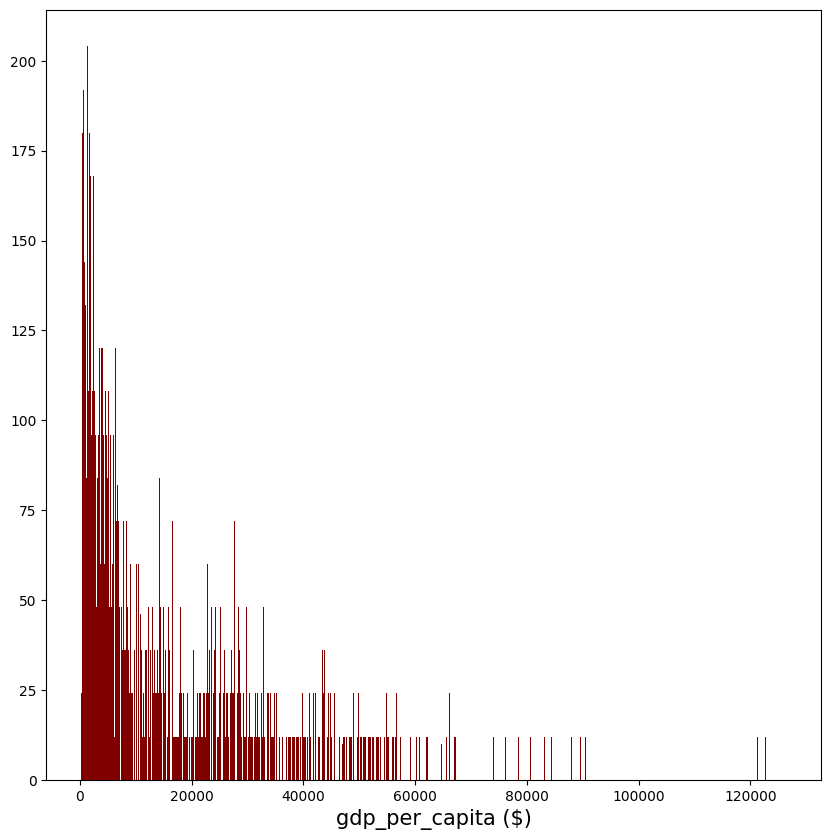

In [11]:
#plotting the histogram with moderate number of bins
for column in new_df.columns.values:                               #using a for loop to iterate through the columns
    plt.figure(figsize=(10,10))
    plt.hist(new_df[column],15 if len(pd.unique(new_df[column]))<20 else len(pd.unique(new_df[column])),color="maroon")    #using the appropriate number if bins
    plt.xlabel(column,fontsize=15)                         
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

In [12]:
#converting year to datetime using .astype
print(pd.unique(df["age"]))
df["age"].str.replace(" years","")
df['age'].replace('5-14','05-14', regex=True, inplace=True)
df["year"]=df["year"].astype(np.int64)
print(df["age"])

['15-24 ' '35-54 ' '75+ ' '25-34 ' '55-74 ' '5-14 ']
0        15-24 
1        35-54 
2        15-24 
3          75+ 
4        25-34 
          ...  
27815    35-54 
27816      75+ 
27817    05-14 
27818    05-14 
27819    55-74 
Name: age, Length: 27820, dtype: object


In [13]:
temp_df=df.groupby(["country","year"]).sum()
display(temp_df.head())
temp_df1=df.groupby(["country"])
display(temp_df1.get_group("Albania").head())
my_list=pd.unique(df["country"])
avg_list=[]
for country in my_list:
    avg_list.append(temp_df1.get_group(country)["suicides_no"].mean())
alt_df=df.groupby(["country"]).mean()
display(alt_df["suicides_no"].head())
id_list=alt_df.nlargest(6,"suicides_no").index.tolist()
print(id_list)
#thus, we have found the top 6 countries by average number of suicides

suicides_no  population  suicides/100k pop   gdp_for_year ($)   \
country year                                                                   
Albania 1987           73     2709600              31.85         25879498800   
        1988           63     2764300              32.46         25512000000   
        1989           68     2803100              33.40         28021499856   
        1992           47     2822500              18.00          8513431008   
        1993           73     2807300              32.56         14736852456   

              gdp_per_capita ($)  
country year                      
Albania 1987                9552  
        1988                9228  
        1989                9996  
        1992                3012  
        1993                5244

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,2156624900,796,Boomers


country
Albania                  7.462121
Antigua and Barbuda      0.033951
Argentina              221.018817
Armenia                  6.392617
Aruba                    0.601190
Name: suicides_no, dtype: float64

['Russian Federation', 'United States', 'Japan', 'Ukraine', 'Germany', 'France']


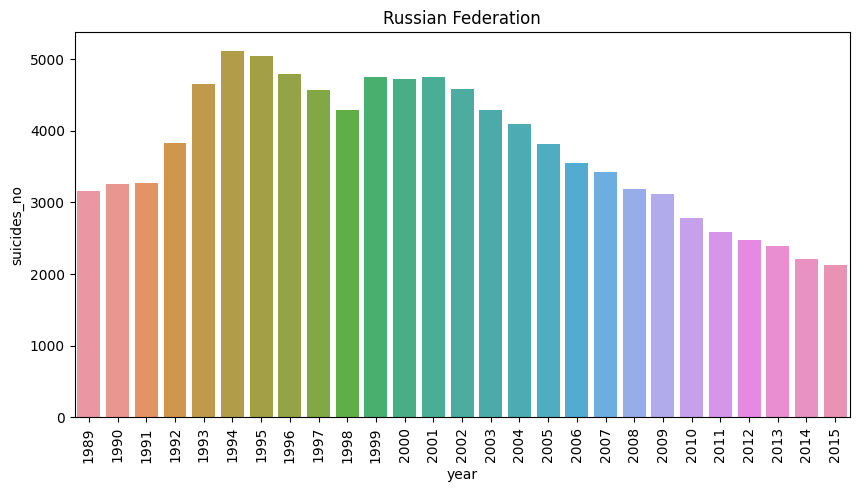

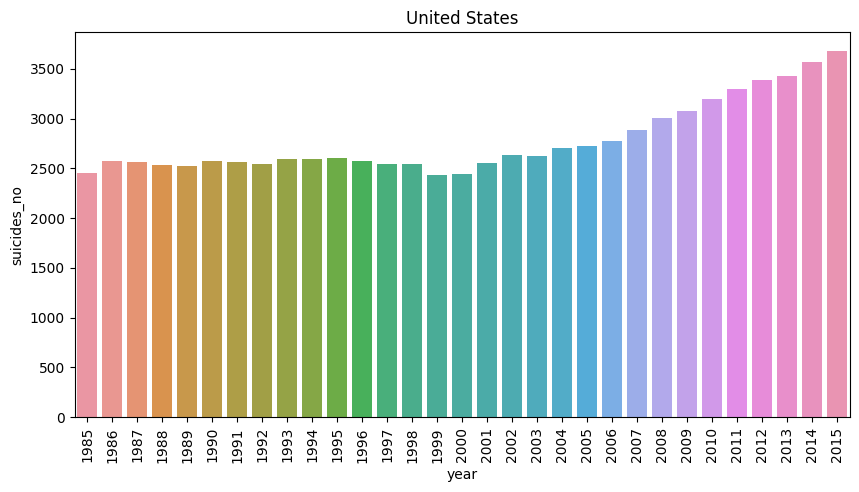

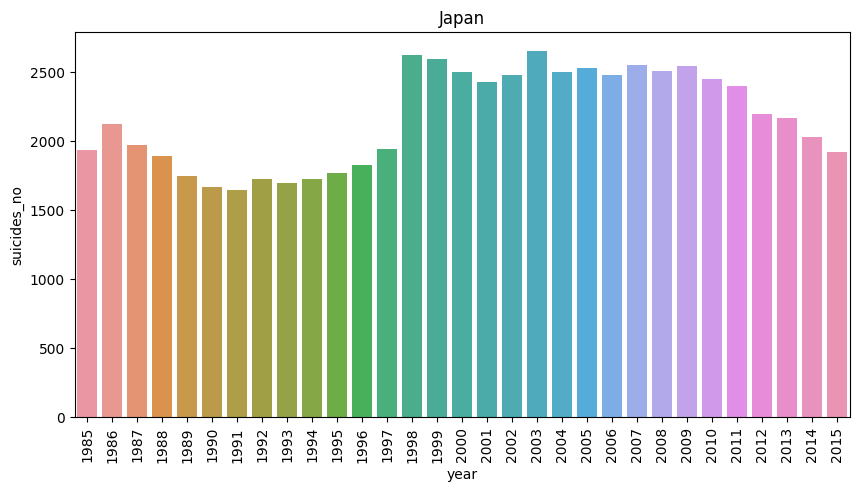

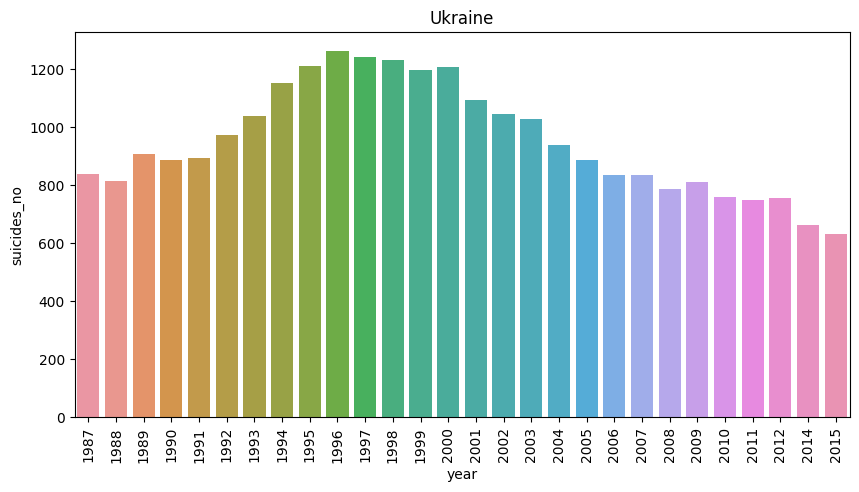

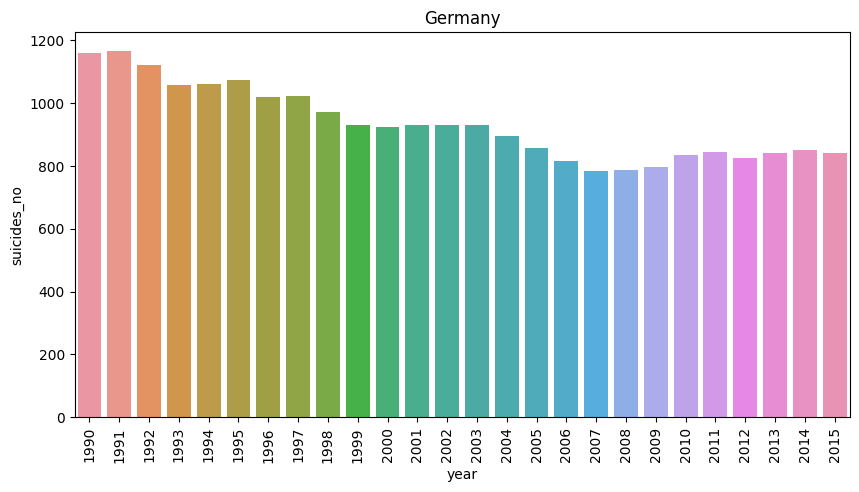

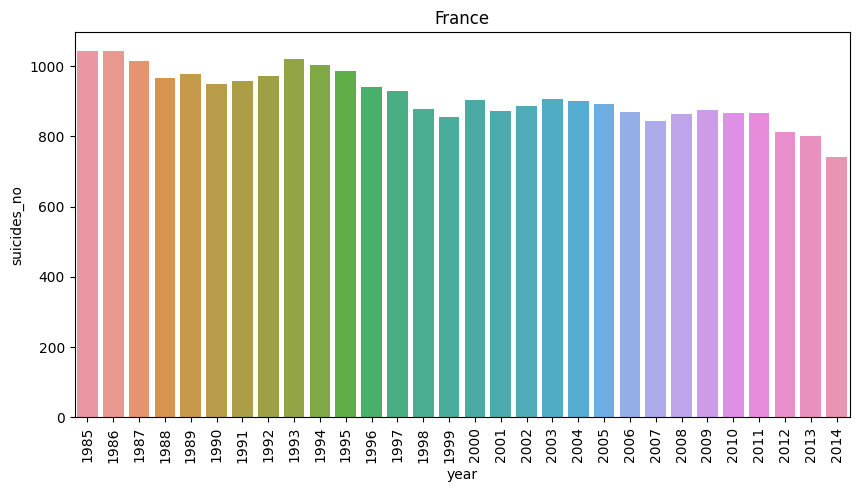

In [14]:
for country in id_list:
    a=temp_df1.get_group(country)
    plt.figure(figsize=(10,5))
    sns.barplot(x=a["year"],y=a["suicides_no"],ci=None)
    plt.xticks(rotation=90)
    plt.title(country)
    plt.show()

/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_24715/134651499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values("age",ascending=True,inplace=True)


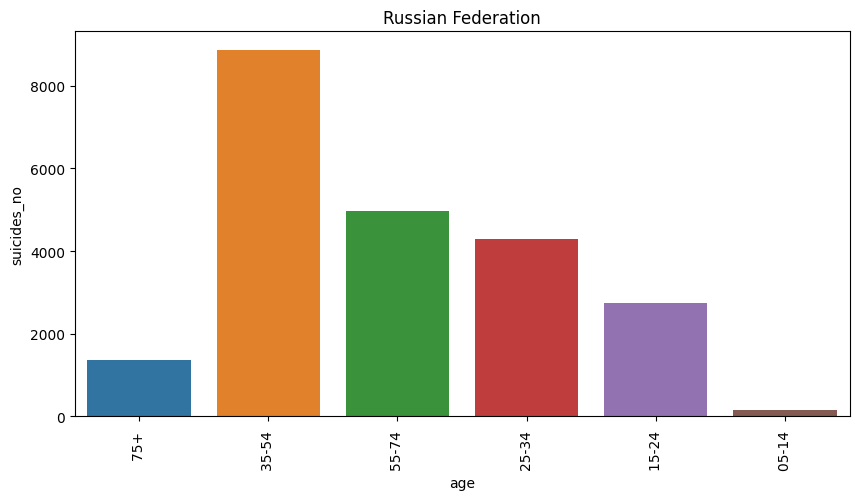

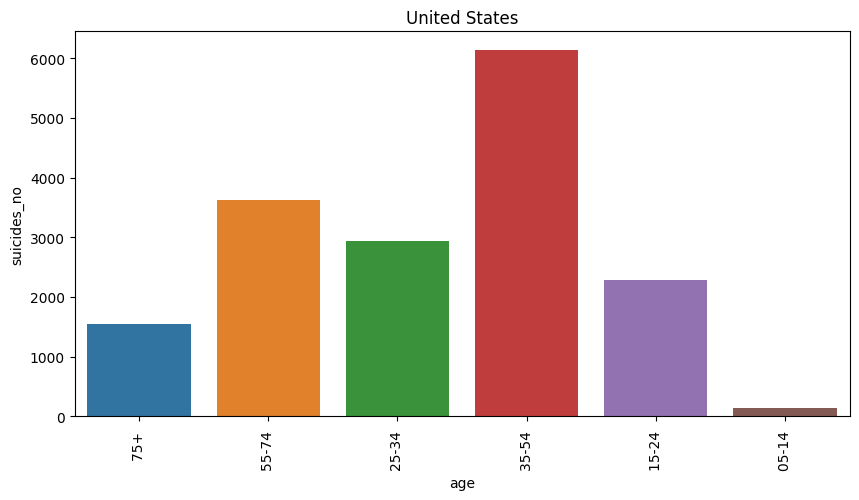

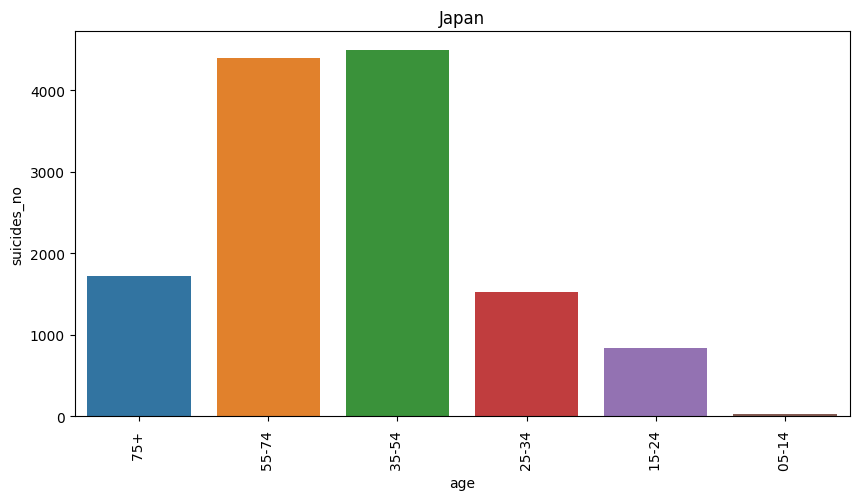

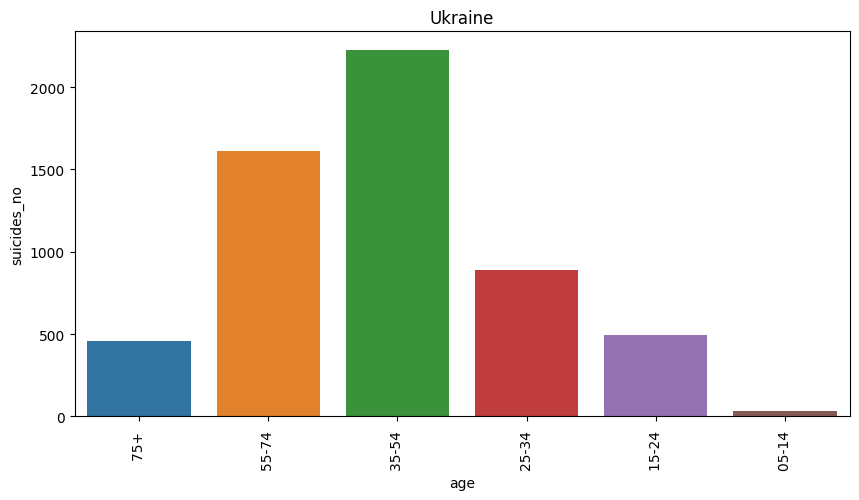

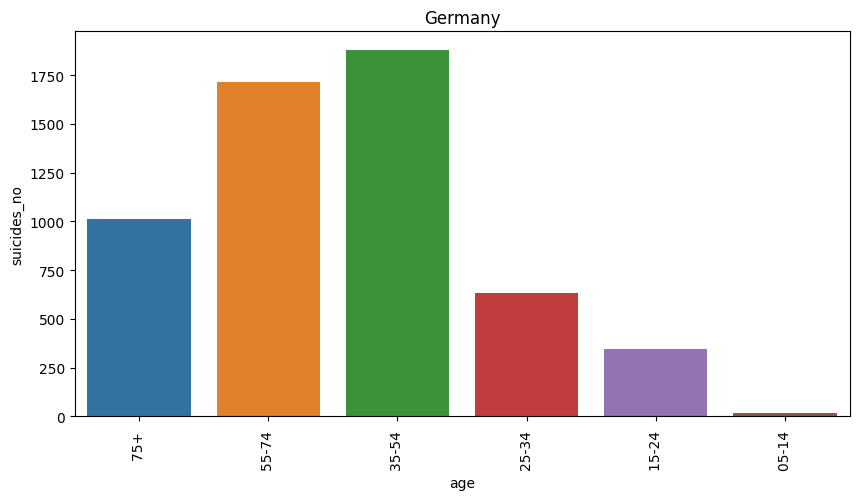

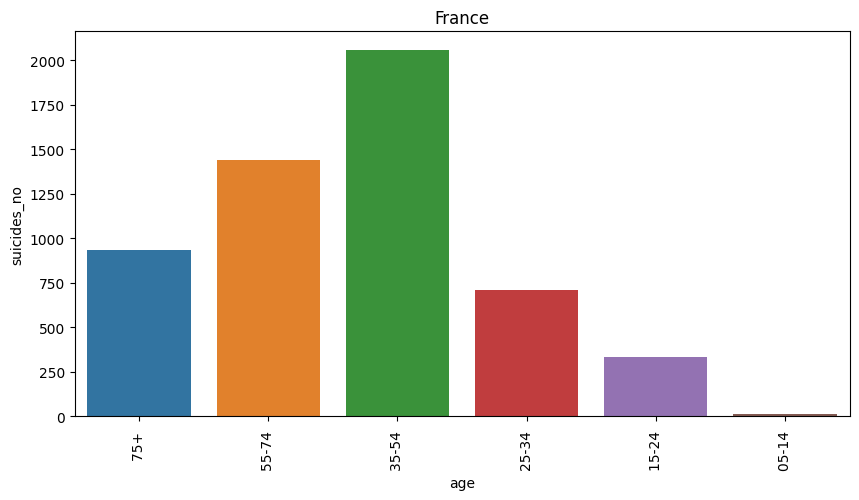

In [15]:
a.sort_values("age",ascending=True,inplace=True)
for country in id_list:
    a=temp_df1.get_group(country)
    plt.figure(figsize=(10,5))
    sns.barplot(x=a["age"],y=a["suicides_no"],ci=None)  #ci=None drops the uncertainity bar
    plt.xticks(rotation=90)
    plt.title(country)
    plt.show()

,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
year,,,,,
1985,83584,495587031,5148.14,55482377117250,1754274
1986,86818,505443747,4905.79,66304815991434,2052318
1987,91836,535845937,5688.24,77884941137100,2822880
1988,88011,515314651,5614.05,87778845602238,2935254
1989,118883,595888144,6109.37,95809130823588,3034212


,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
year,,,,,
1985,32479,513013055,1663.75,55482377117250,1754274
1986,33852,524465866,1674.05,66304815991434,2052318
1987,35006,559183789,1857.21,77884941137100,2822880
1988,33015,538779773,1859.08,87778845602238,2935254
1989,41361,629626203,1927.17,95809130823588,3034212


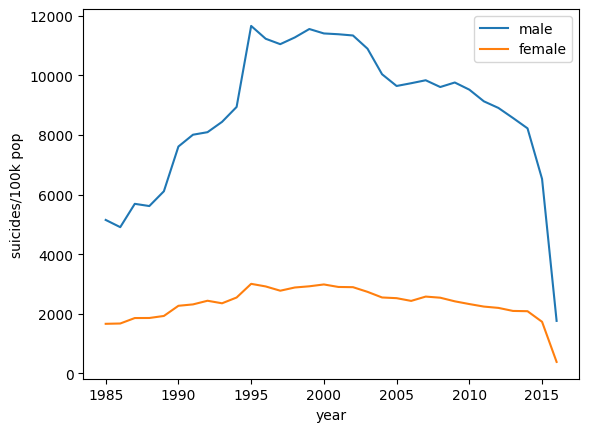

In [16]:
#f = plt.figure(figsize=(20,15))
# separating male and female data
df4 = df.loc[df['sex']=='male']
df5 = df.loc[df['sex']=='female']
# grouping by years taking means
df6 = df4.groupby(by='year').sum()
df7 = df5.groupby(by='year').sum()
display(df6.head())
display(df7.head())
sns.lineplot(x=df6.index, y=df6['suicides/100k pop'],label='male')
sns.lineplot(x=df7.index, y=df7['suicides/100k pop'],label='female')
plt.show()

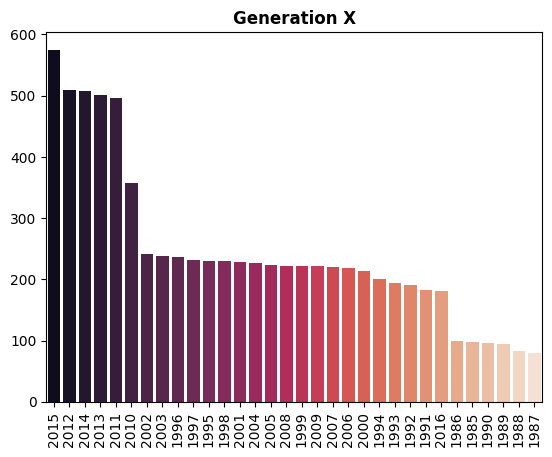

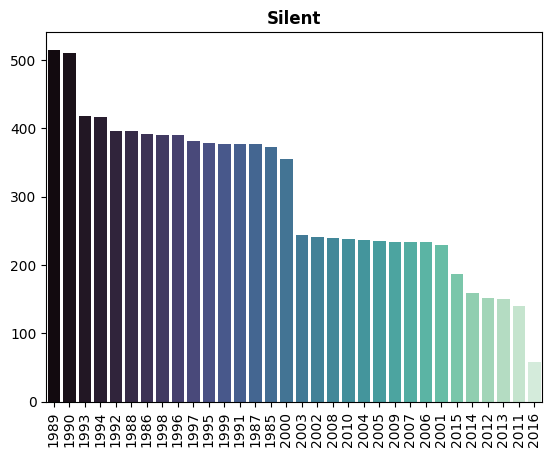

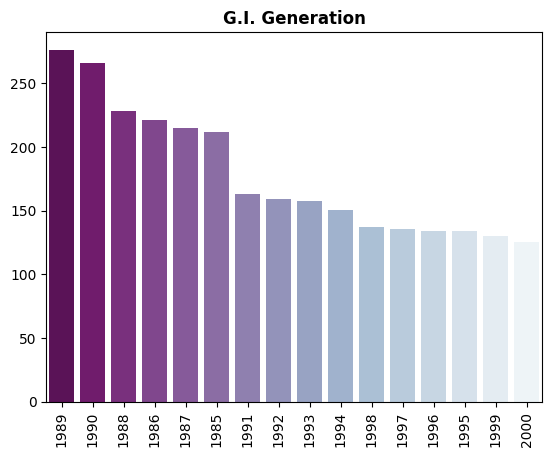

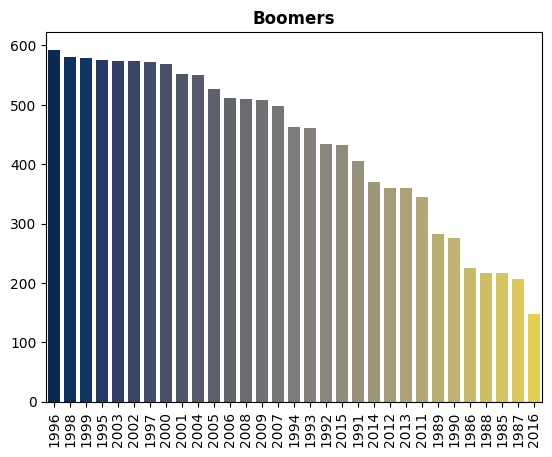

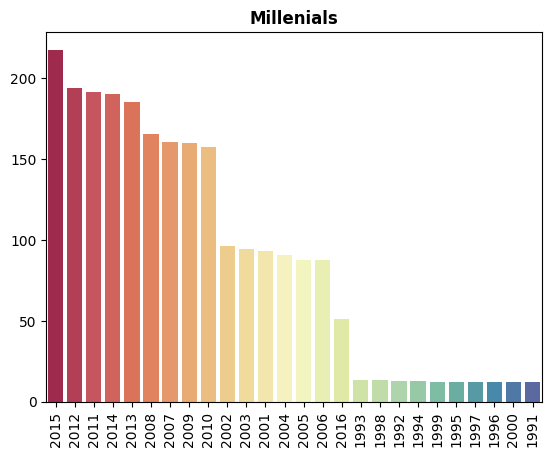

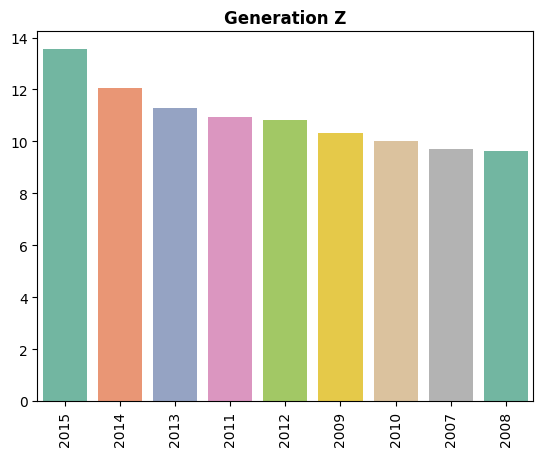

In [17]:
new_df = df[["generation", "year", "suicides_no"]]
df5 = new_df.copy()
df5.columns = ['generation', 'year', 'suicides_no']
# convert the df5 to a compatible pivot table
df5 = df5.pivot_table(index='year', columns='generation', values='suicides_no')
# filling nan by 0
df5 = df5.fillna(0)
# cerating color list for selection
palette_list = ["rocket","mako","BuPu_r","cividis","Spectral","Set2"]
# text of column headers
columns_text = list(new_df['generation'].unique())
for i in range(6):
    plt.xticks(rotation=90)
    # getting a particular generation
    ser1 = df5[columns_text[i]].copy()
    ser1 = ser1.reset_index()
    # renaming column headers
    ser1.columns=['Year','Suicides']
    # Selecting only non negative suicide-years for a particular generation
    ser1 = ser1[ser1>0]
    # dropping rows with nan values
    ser1 = ser1.dropna()
    # sorting suicides in non decreasing order
    ser1 = ser1.sort_values('Suicides',ascending=False).reset_index(drop=True)
    ax = sns.barplot(x='Year',y='Suicides',data=ser1,order = ser1['Year'],palette=palette_list[i])
    # removing x and y labels for a common label
    ax.set(xlabel='',ylabel='')
    plt.title(columns_text[i],weight='bold')
    plt.show()

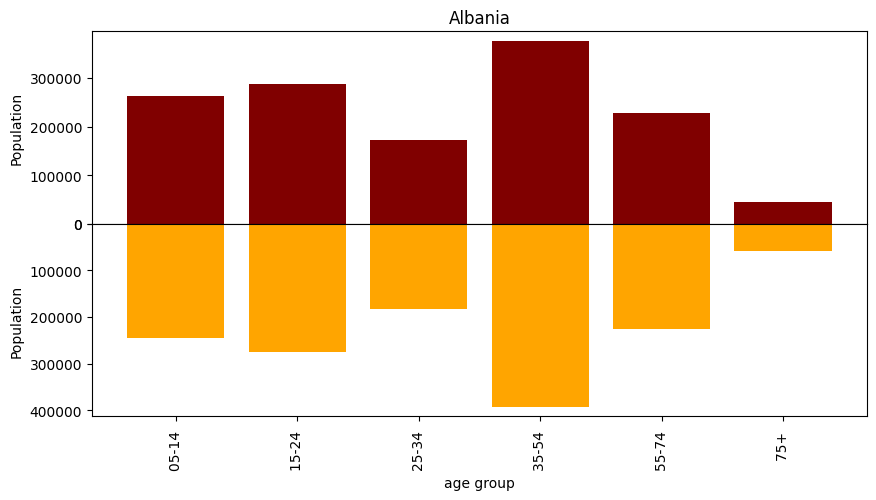

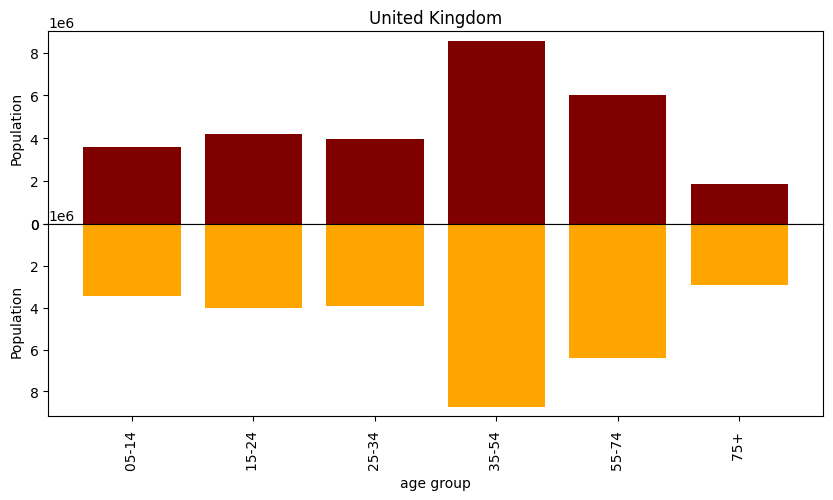

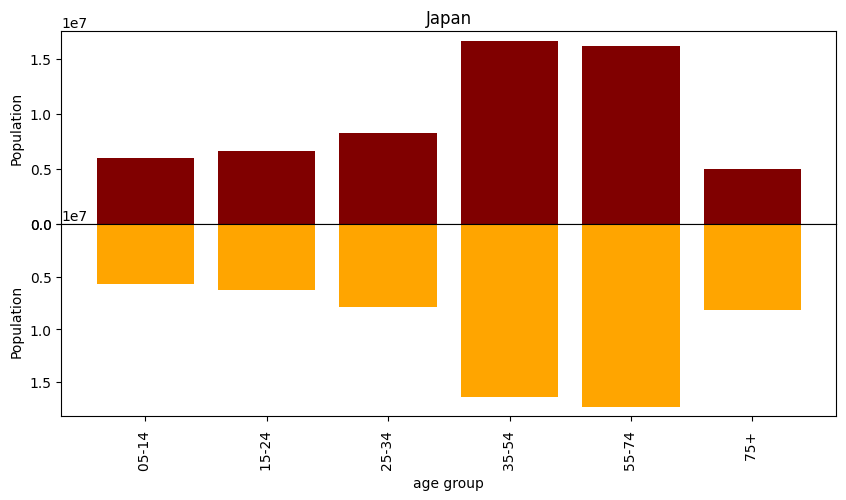

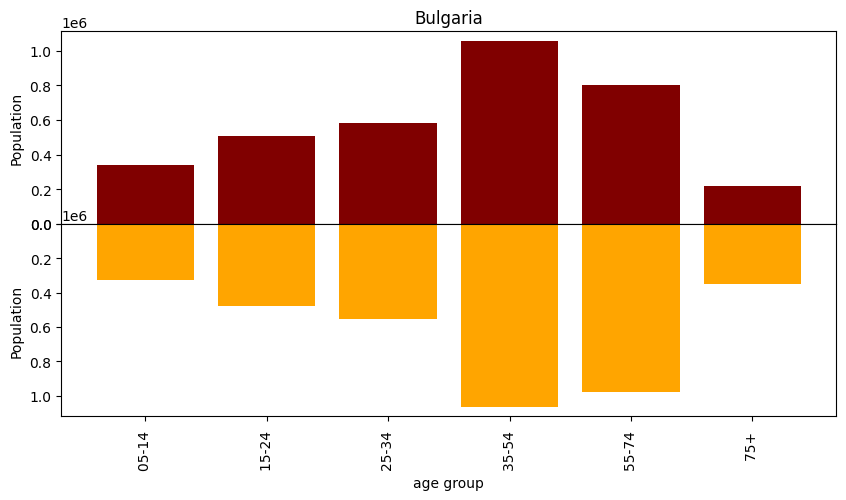

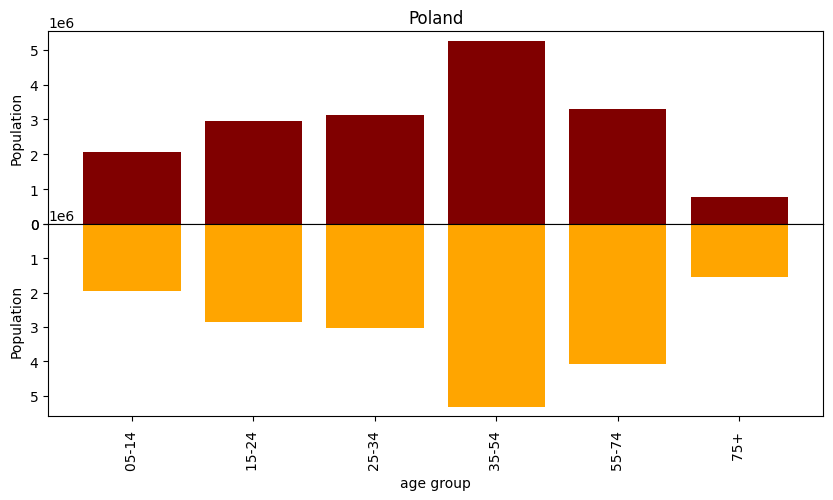

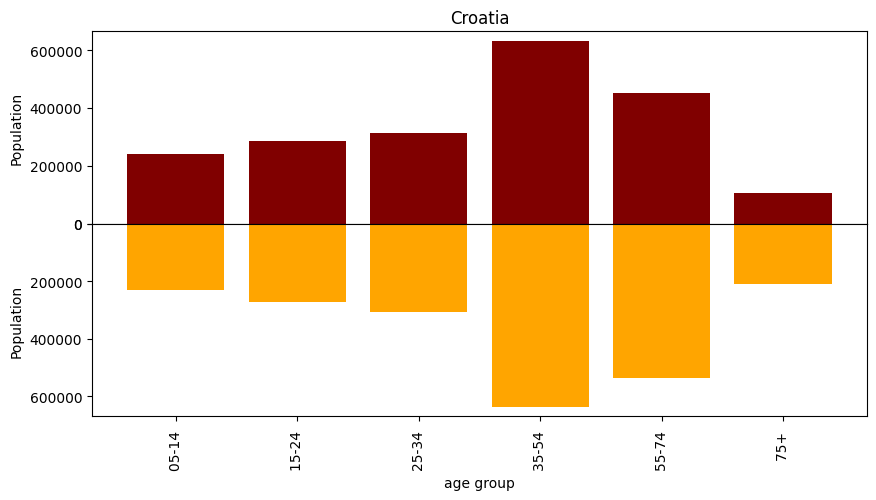

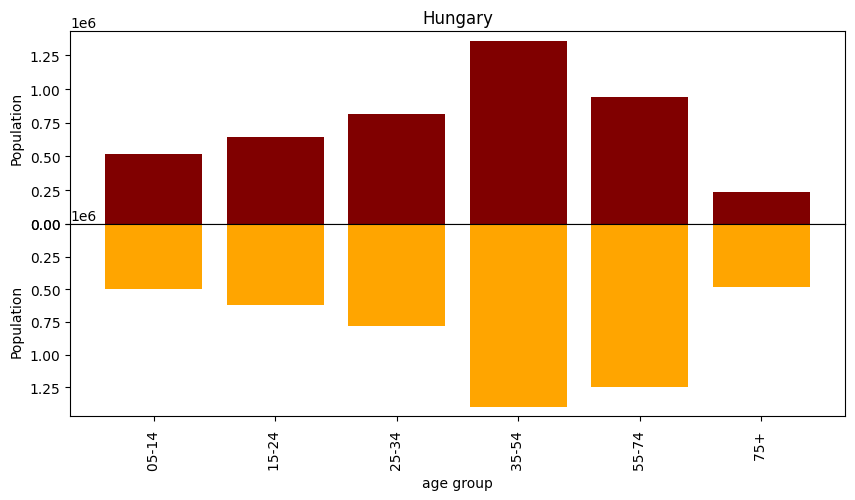

In [18]:
df2 = df.groupby(['year','country','sex','age']).sum()
# finding an index from multiindex using df.xs
df3 = df2.xs(2008,level='year')
# converting multiindex to normal index
df3 = df3.reset_index()
# selecting some countries for visualization
countries = ['Albania','United Kingdom','Japan','Bulgaria','Poland',"Croatia","Hungary"]
for country in countries:
    #selecting countries one by one
    df4 = df3.loc[df3['country']==country]
    #Selecting population and age columns of male and female data
    df_male = df4.loc[df4['sex']=='male'][['population','age']]
    df_female = df4.loc[df4['sex']=='female'][['population','age']]
    # merging male female data by age data to plot age-wise
    df_merge = pd.merge(df_male, df_female, on='age')
    df_male.reset_index(drop=True,inplace=True)
    df_female.reset_index(drop=True,inplace=True)
    df_merge = df_merge[['age','population_x','population_y']]
    # For bihist plot creating subplot with 2 rows and 1 column
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5))
    # seelcting an axis, clor and data for each plot
    for ax, column, color, invert in zip(axes.ravel(), ['population_x','population_y'], ['maroon', 'orange'],  [False,True]):
        ax.bar(df_merge['age'],df_merge[column],  color=color)
        plt.xticks(rotation=90)
        ax.set(xlabel='age group',ylabel='Population')
        # inverting if counter invert is true(alternative)
        if invert:
            ax.invert_yaxis()
        # alternatively plotting title as we need one title for bihist
        else :
            ax.set_title(country)
    # To stick bihists together making hspace between them=0
    plt.subplots_adjust(hspace=0)

In [19]:
df_new=n_df.copy()
df_new=df_new.dropna(subset=["HDI for year"])
#getting a random sample from the dataframe
sample_df=df_new.sample(n=100)
display(sample_df.head(10))
sample_df=sample_df.sort_index()
display(sample_df.head(10))


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1197,Armenia,2011,female,25-34 years,0,244912,0.00,Armenia2011,0.723,"10,142,111,334",3798,Millenials
27499,Uruguay,2010,male,15-24 years,69,262585,26.28,Uruguay2010,0.780,"40,284,481,652",12882,Millenials
10932,Guatemala,2005,male,75+ years,8,89636,8.92,Guatemala2005,0.576,"27,211,377,225",2450,Silent
12484,Israel,1990,female,25-34 years,14,332700,4.21,Israel1990,0.785,"58,986,997,917",14193,Boomers
8329,El Salvador,2012,female,55-74 years,4,389103,1.03,El Salvador2012,0.662,"21,386,153,000",3806,Boomers
13224,Jamaica,1990,female,35-54 years,0,200357,0.00,Jamaica1990,0.671,"4,592,224,067",2155,Silent
3848,Belize,1990,male,55-74 years,1,6300,15.87,Belize1990,0.644,"413,050,000",2614,G.I. Generation
2839,Bahrain,2010,male,75+ years,0,4289,0.00,Bahrain2010,0.819,"25,713,271,277",22572,Silent
19300,Poland,2011,male,15-24 years,515,2616051,19.69,Poland2011,0.833,"528,832,185,770",14686,Millenials
27438,Uruguay,2005,male,25-34 years,66,243372,27.12,Uruguay2005,0.756,"17,362,857,684",5655,Generation X


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
924,Argentina,2013,male,75+ years,168,699046,24.03,Argentina2013,0.833,"552,025,140,252",14206,Silent
1197,Armenia,2011,female,25-34 years,0,244912,0.00,Armenia2011,0.723,"10,142,111,334",3798,Millenials
1608,Australia,2000,male,35-54 years,745,2769752,26.90,Australia2000,0.898,"415,034,227,218",23219,Boomers
2605,Bahamas,2011,female,35-54 years,0,53821,0.00,Bahamas2011,0.778,"10,070,450,000",29761,Generation X
2643,Bahrain,1985,female,75+ years,0,1500,0.00,Bahrain1985,0.727,"3,651,861,702",9980,G.I. Generation
2839,Bahrain,2010,male,75+ years,0,4289,0.00,Bahrain2010,0.819,"25,713,271,277",22572,Silent
2889,Barbados,1985,male,55-74 years,3,13000,23.08,Barbados1985,0.700,"1,417,575,550",6137,G.I. Generation
2898,Barbados,1985,male,35-54 years,0,20000,0.00,Barbados1985,0.700,"1,417,575,550",6137,Silent
3683,Belgium,2005,male,25-34 years,195,691901,28.18,Belgium2005,0.866,"387,365,750,529",39124,Generation X
3848,Belize,1990,male,55-74 years,1,6300,15.87,Belize1990,0.644,"413,050,000",2614,G.I. Generation


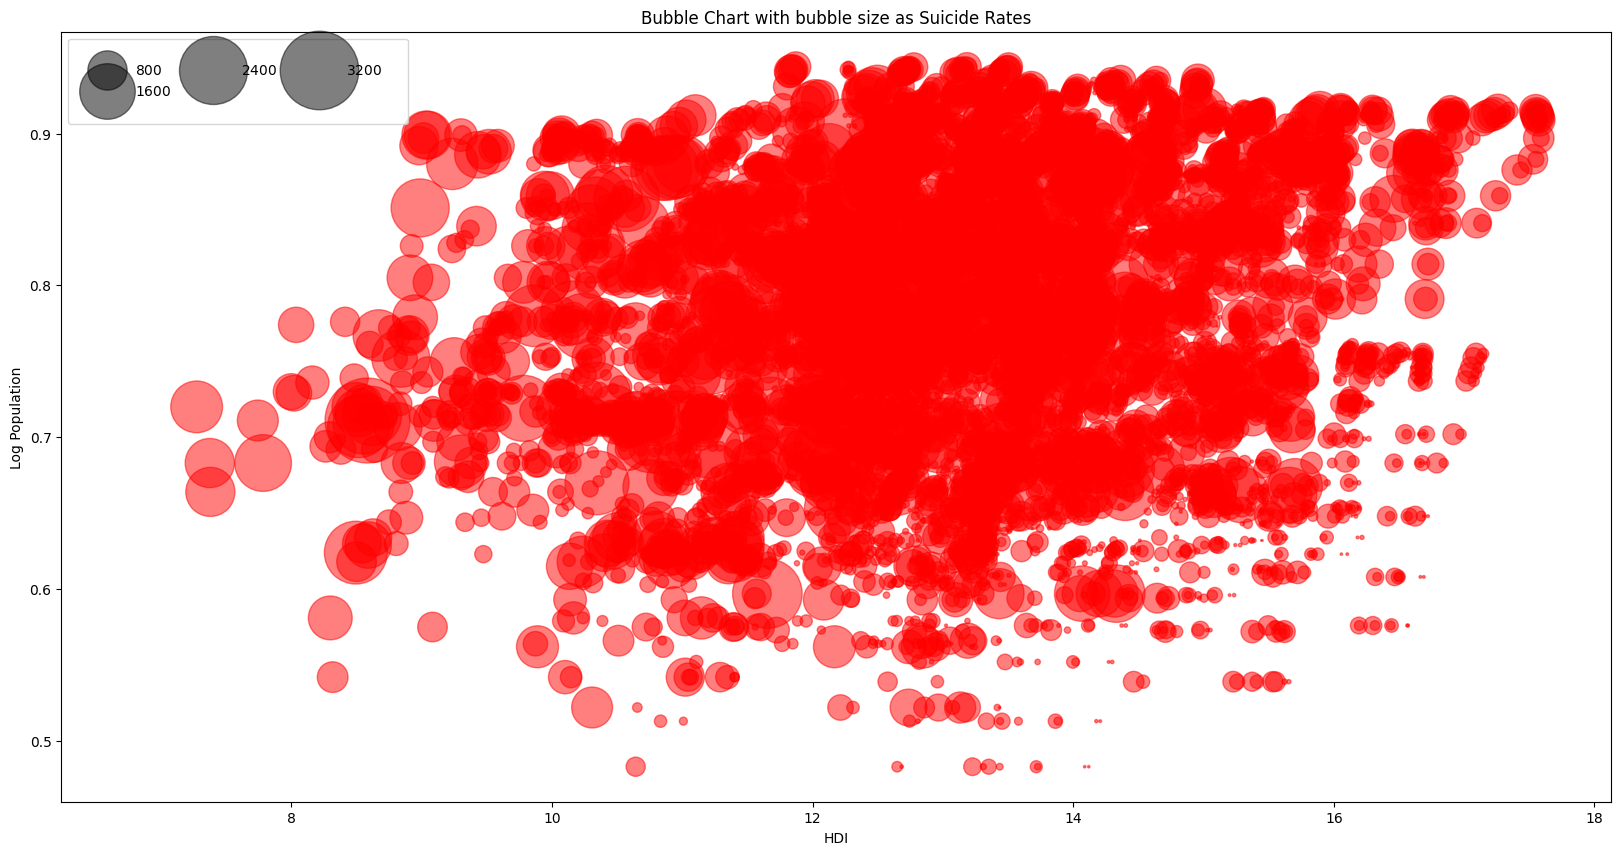

In [20]:
y=df_new["HDI for year"]
x=np.log(df_new["population"])
z=df_new["suicides/100k pop"]
plt.figure(figsize=(20,10))
ax = plt.scatter(x,y,s = z*20, c="red",alpha=0.5)
plt.legend(*ax.legend_elements("sizes", num=5),ncol=3, frameon=True,handlelength=2, borderpad = 1.8,handletextpad=1)
plt.xlabel('HDI')
plt.ylabel('Log Population')
plt.title('Bubble Chart with bubble size as Suicide Rates')
plt.show()